In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Preparation

In [2]:
mean1=np.array([1,0.5])
cov1=np.array([[1,0.1],[0.1,1.2]])

mean2=np.array([4,5])
cov2=np.array([[1.21,0.1],[0.1,1.3]])

#normal distribution
dist1=np.random.multivariate_normal(mean1,cov1,500)
dist2=np.random.multivariate_normal(mean2,cov2,500)

print(dist1.shape)
print(dist2.shape)



(500, 2)
(500, 2)


# Data Visualize

In [3]:
plt.style.use('seaborn')

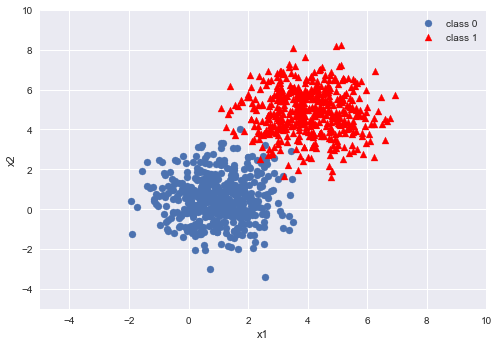

In [4]:
plt.figure(0)
plt.scatter(dist1[:,0],dist1[:,1],label="class 0")
plt.scatter(dist2[:,0],dist2[:,1],label="class 1",color="red",marker="^")
plt.legend()
plt.xlim(-5,10)
plt.ylim(-5,10)
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

# Creating tarining and test set

In [5]:
data=np.zeros((1000,3))
data[:500,:2]=dist1
data[500:,:2]=dist2
data[500:,-1]=1.0
print(data)

[[ 2.04333707e+00  1.60583550e+00  0.00000000e+00]
 [-3.19338297e-01  1.31867023e+00  0.00000000e+00]
 [-1.40733130e-03  1.07776693e+00  0.00000000e+00]
 ...
 [ 3.42885627e+00  6.84133455e+00  1.00000000e+00]
 [ 3.91127643e+00  6.31260782e+00  1.00000000e+00]
 [ 3.67036574e+00  5.00358036e+00  1.00000000e+00]]


In [6]:
np.random.shuffle(data)

In [7]:
split=int(0.8*data.shape[0])

In [8]:
print(data.shape)
print(split)

(1000, 3)
800


In [9]:
X_train=data[:split:,:-1]
X_test=data[split:,:-1]

Y_train=data[:split,-1]
Y_test=data[split:,-1]
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(800, 2) (800,)
(200, 2) (200,)


# Logistic Regression Functions

In [48]:
def sigmoid(z):
    return 1.0/(1.0+np.exp(-1.0*z))

def hypothesis(x,w,b):
    h=np.dot(x,w)+b
    return sigmoid(h)


def error(y_true,x,w,b):
    
    m = x.shape[0]
    
    err = 0.0
    
    for i in range(m):
        hx = hypothesis(x[i],w,b) 
        err += y_true[i]*np.log2(hx) + (1-y_true[i])*np.log2(1-hx)
        
    
    return -err/m

def get_grads(y_true,x,w,b):
    grad_w=np.zeros(w.shape)
    grad_b=0.0
    
    m=x.shape[0]
    
    for i in range(m):
        hx=hypothesis(x[i],w,b)
        grad_w += (y_true[i]-hx)*x[i]
        grad_b += (y_true[i]-hx)
        
    grad_w /= m
    grad_b /= m
    return [grad_w,grad_b]

#one iteration of gradient descent 
def grad_descent(x,y_true,w,b,learning_rate=0.1):
    err=error(y_true,x,w,b)
    [grad_w,grad_b]=get_grads(y_true,x,w,b)
    
    w=w+learning_rate*grad_w
    b=b+learning_rate*grad_b
    
    return err,w,b

def predict(x,w,b):
    confidence=hypothesis(x,w,b)
    if confidence<0.5:
        return 0
    else:
        return 1

def get_acc(x_tst,y_tst,w,b):
    y_pred=[]
    
    for i in range(y_tst.shape[0]):
        p=predict(x_tst[i],w,b)
        y_pred.append(p)
        
    y_pred=np.array(y_pred)
    
    return ((y_pred==y_tst).sum())/y_tst.shape[0]


    
        

In [49]:
loss=[]
acc=[]

W=2*np.random.random((X_train.shape[1],))
b=5*np.random.random()

In [53]:
for i in range(1000):
    l,W,b = grad_descent(X_train,Y_train,W,b,learning_rate=0.1)
    acc.append(get_acc(X_test,Y_test,W,b))
    loss.append(l)

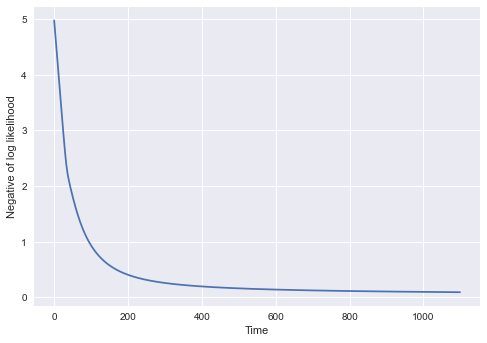

In [54]:
plt.plot(loss)
plt.xlabel("Time")
plt.ylabel("Negative of log likelihood")
plt.show()



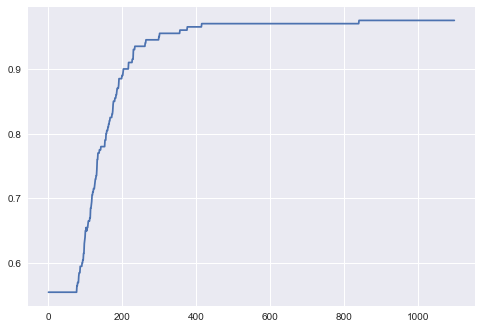

0.975


In [56]:
plt.plot(acc)
plt.show()
print(acc[-1])

In [58]:
print(W)
print(b)

[0.7178909 1.2784985]
-4.8307321895689235


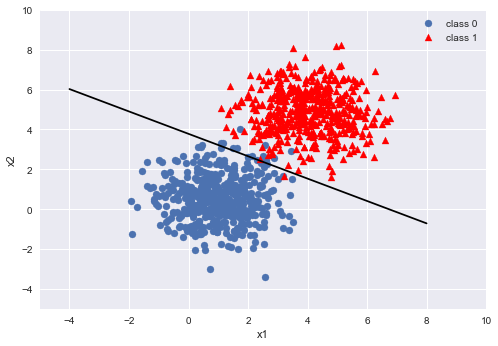

In [60]:
plt.figure(0)
plt.scatter(dist1[:,0],dist1[:,1],label="class 0")
plt.scatter(dist2[:,0],dist2[:,1],label="class 1",color="red",marker="^")
plt.legend()
plt.xlim(-5,10)
plt.ylim(-5,10)

x=np.linspace(-4,8,10)
y=-(x*W[0]+b)/W[1]
plt.plot(x,y,color="k")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()